# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=2)
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
import operator

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report
from category_encoders.binary import BinaryEncoder
import matplotlib.patches as mpatches
import warnings 
warnings.filterwarnings('ignore')

# Read Data

In [ ]:
df_train = pd.read_csv('train.csv')
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
df_test = pd.read_csv('test.csv')
ID = df_test.id
df_test = df_test.drop('id', axis=1)

# Check Duplicated Data

In [ ]:
df_train[df_train.duplicated()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


# Check Missing Value

In [ ]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

# Exploratory Data Analysis - Numerical Data

In [ ]:
df_train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [ ]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


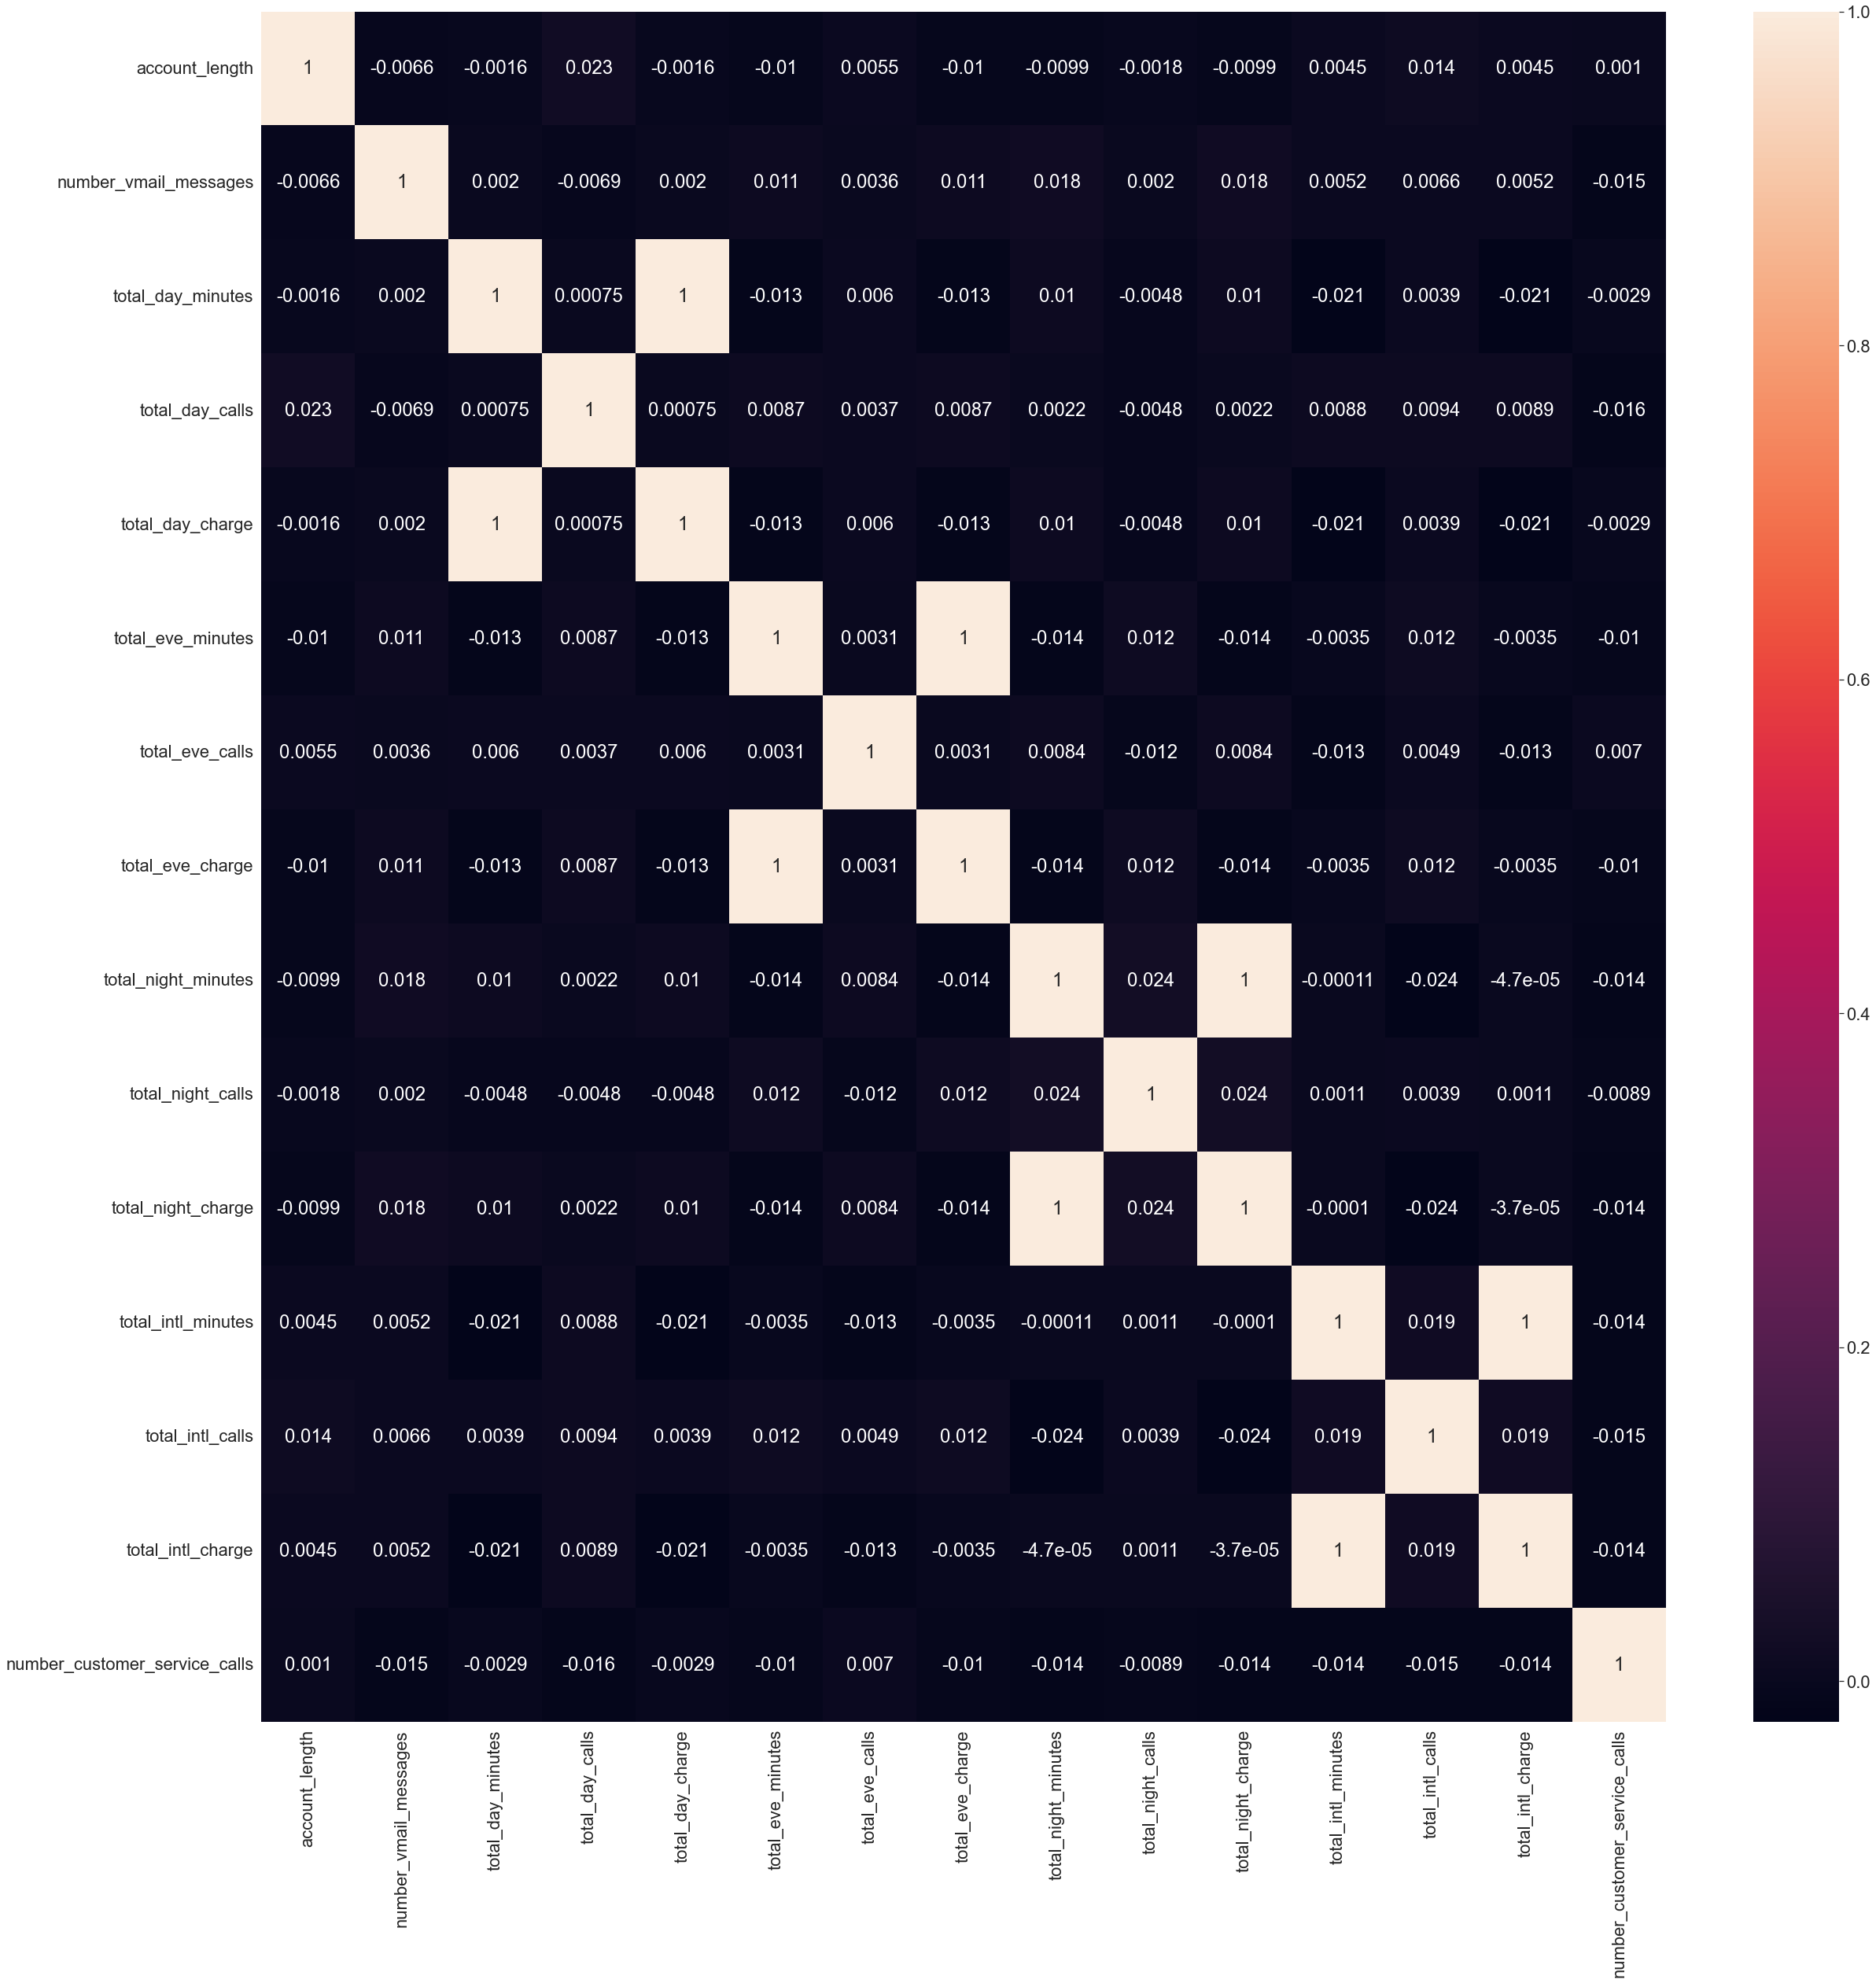

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

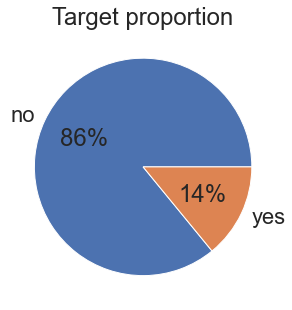

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(df_train.churn.value_counts(), labels=['no', 'yes'], autopct='%.0f%%')
plt.title('Target proportion')
plt.show()

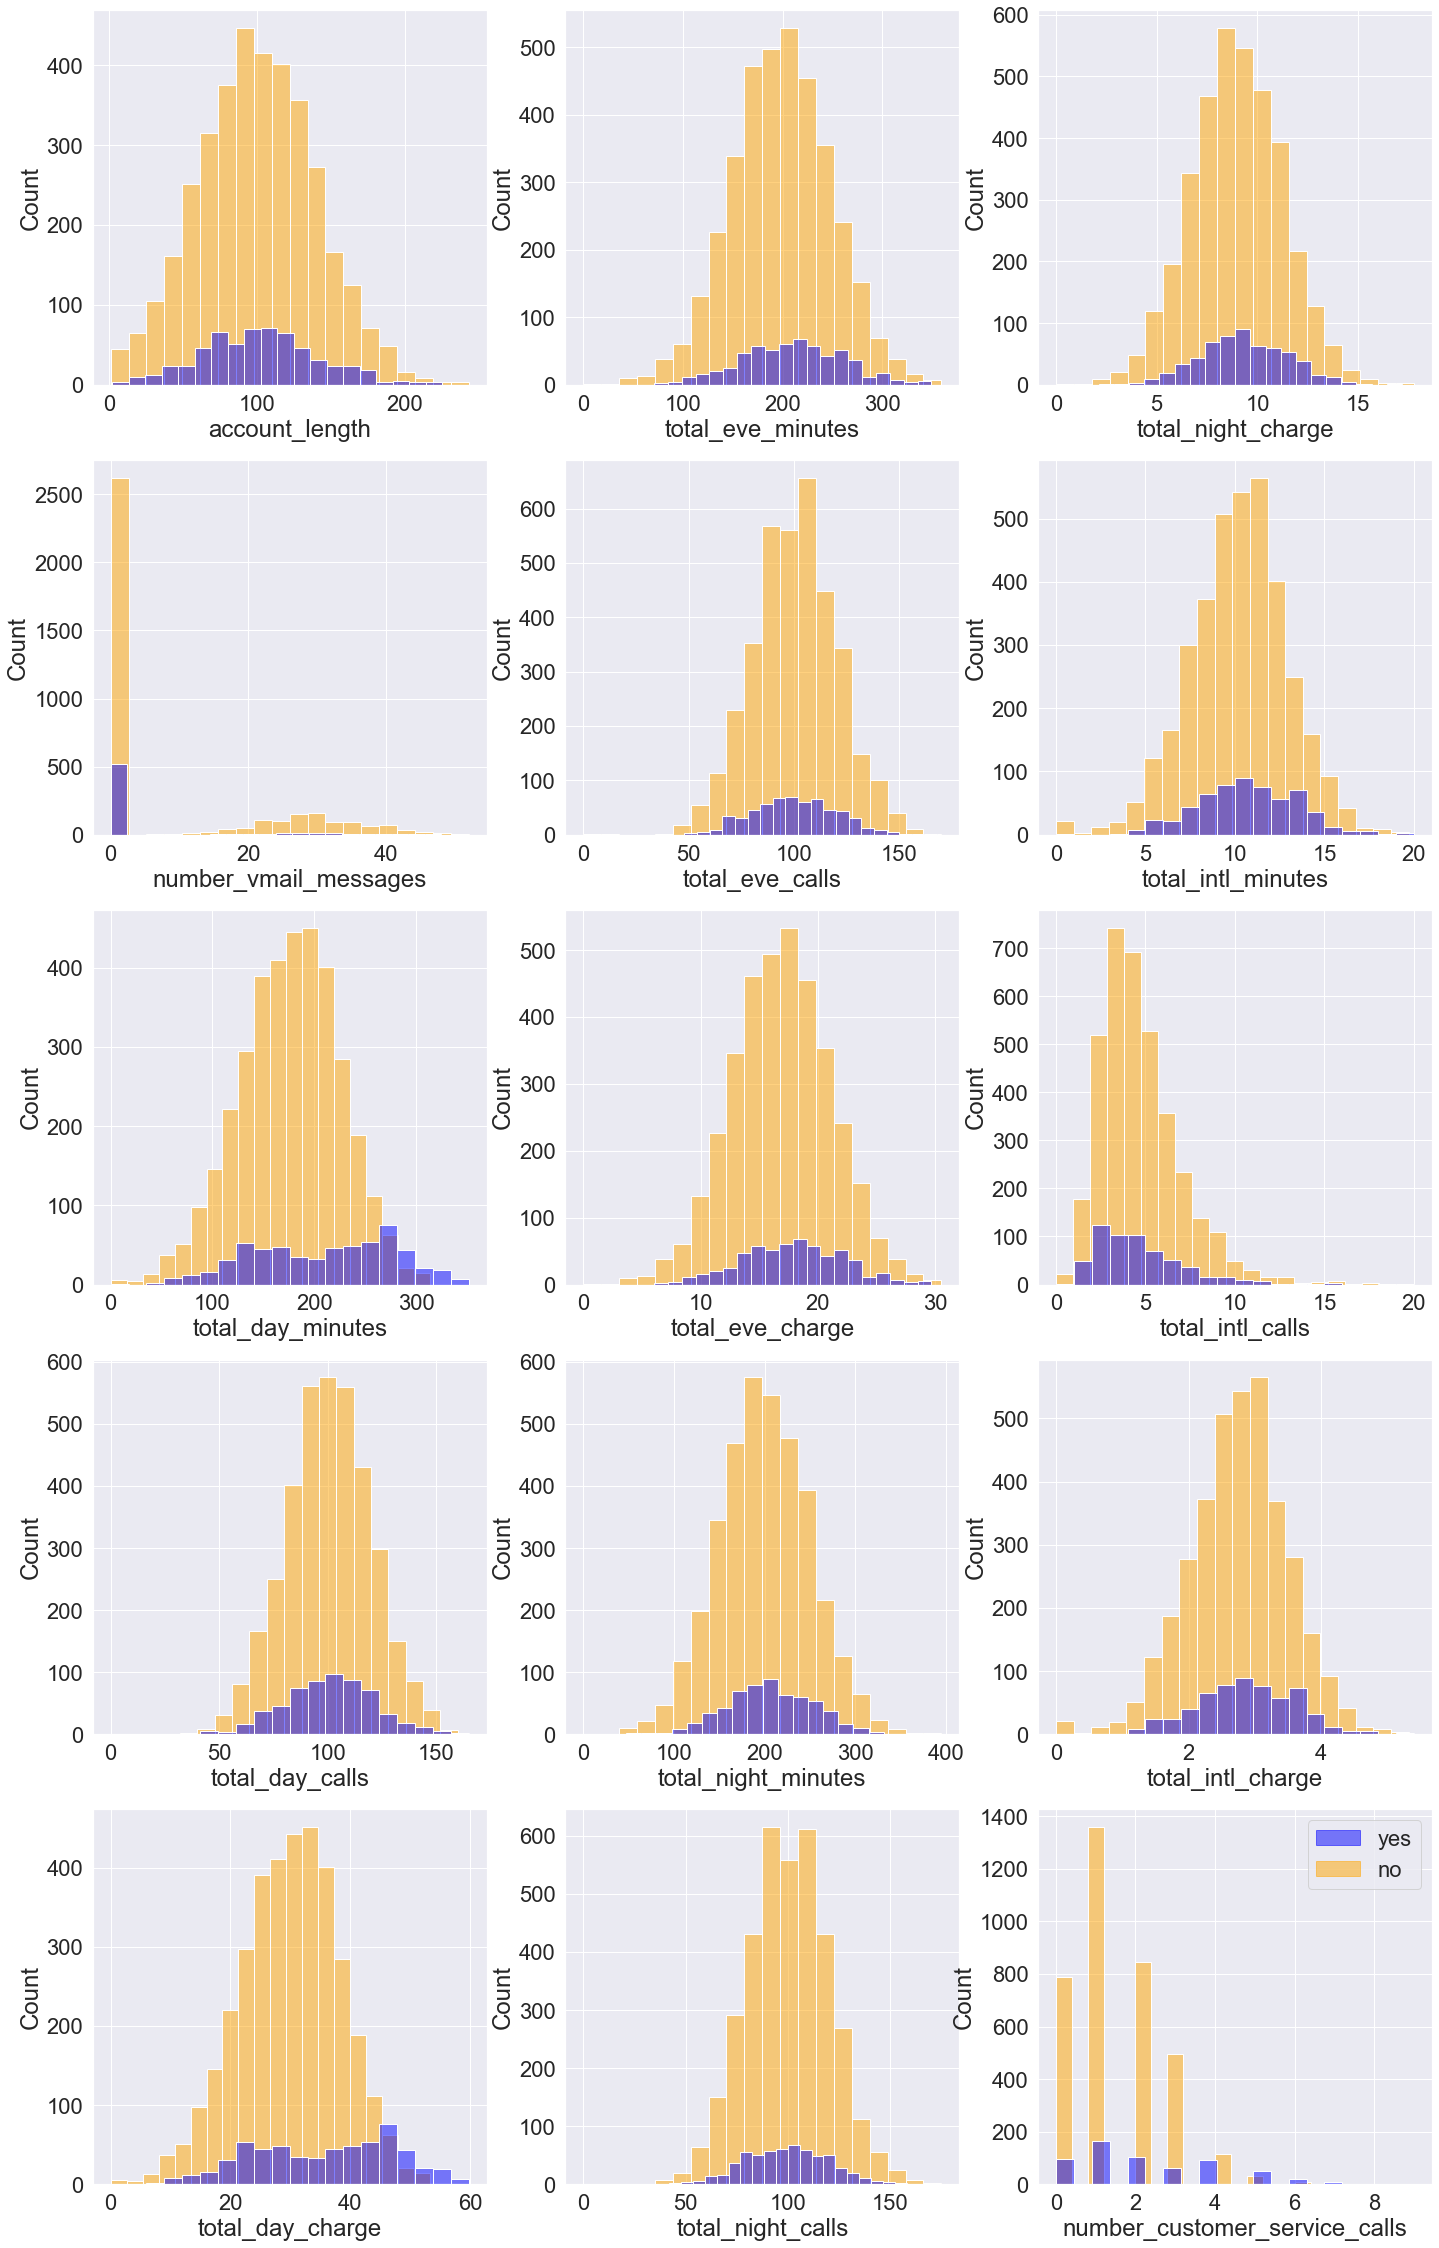

In [ ]:
numerical_data = df_train.corr().index
fig, ax = plt.subplots(5,3, figsize=(24,40))
for j in range(5):
    for i in range(3):
        sns.histplot(df_train[df_train.churn == 'no'][numerical_data[j+5*i]], ax=ax[j][i], color='orange', alpha=0.5, bins=20)
        sns.histplot(df_train[df_train.churn == 'yes'][numerical_data[j+5*i]], ax=ax[j][i], color='blue', alpha=0.5, bins=20)
blue = mpatches.Patch(color='blue', label='yes', alpha=0.5)
orange = mpatches.Patch(color='orange', label='no', alpha=0.5)
plt.legend(handles=[blue, orange])        
plt.show()

# Outliers Detection

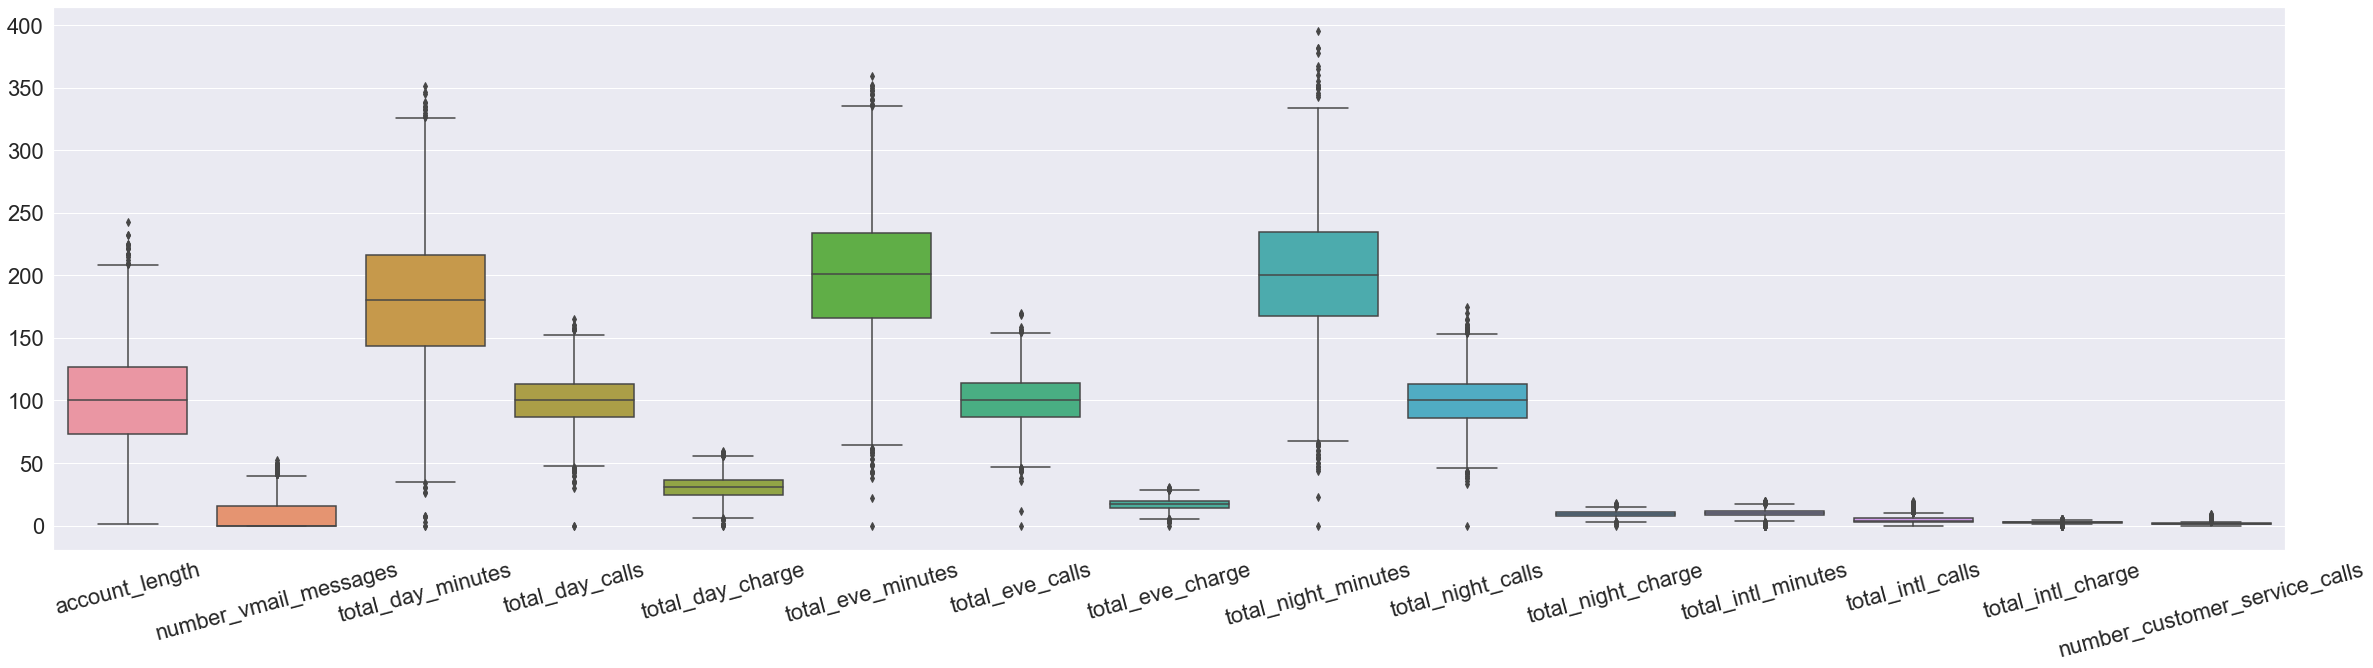

In [ ]:
fig, ax = plt.subplots(figsize=(40,10))
sns.boxplot(data=df_train)
plt.xticks(rotation=15)
plt.show()

# RobustScaler for Scaling and Handling Outliers

In [ ]:
df_train.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], inplace=True, axis=1)

In [ ]:
scaler = preprocessing.RobustScaler()
df_train[df_train.corr().index] = scaler.fit_transform(df_train[df_train.corr().index])

# Exploratory Data Analysis - Categorical Data

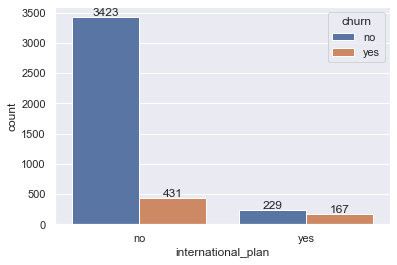

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots()
sns.countplot(data=df_train, x = 'international_plan', hue='churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

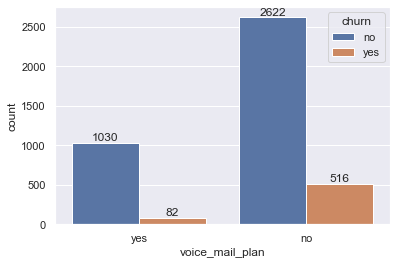

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data=df_train, x = 'voice_mail_plan', hue='churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

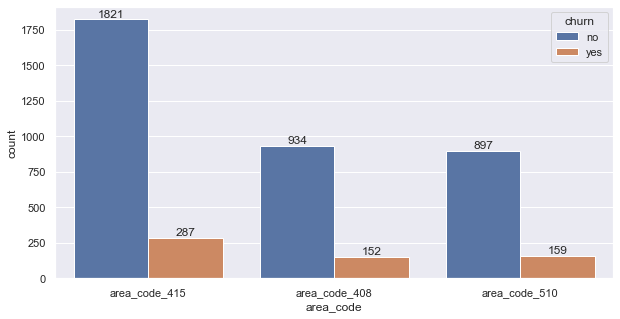

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df_train, x = 'area_code', hue='churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

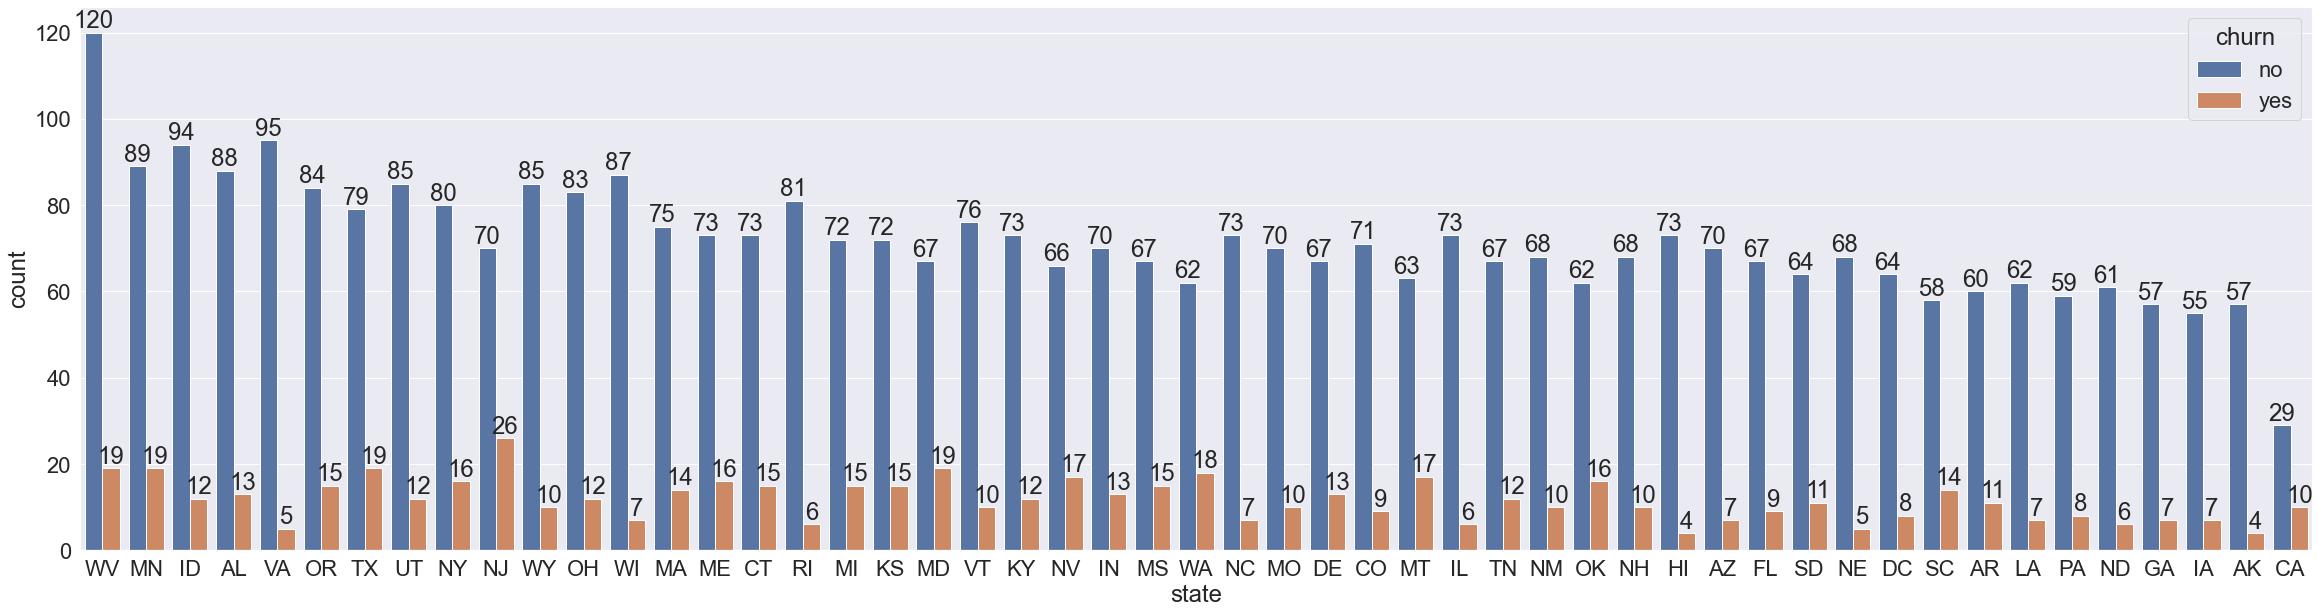

In [ ]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(40,10))
sns.countplot(data=df_train, x = 'state', hue='churn', order = df_train.state.value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# Handling Categorical Data 

## Encoding

In [ ]:
for column in ['churn','international_plan', 'voice_mail_plan']:
    df_train[column] = LabelEncoder().fit_transform(df_train[column])

NameError: name 'LabelEncoder' is not defined

## Binary Encoding (state)

In [ ]:
len(df_train.state.unique())

51

In [ ]:
encoder = BinaryEncoder(df_train.state,return_df=True)
state = encoder.fit_transform(df_train.state, inplace=True) 
state

,state_0,state_1,state_2,state_3,state_4,state_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
4245,0,0,1,0,1,1
4246,0,0,0,1,1,1
4247,1,0,0,0,1,0
4248,0,1,0,1,0,1


## One Hot Encoding (area_code)

In [ ]:
area_code = pd.get_dummies(df_train['area_code'])
df_train.drop('area_code', axis = 1, inplace = True)
df_train = pd.concat([area_code, df_train], axis=1)

# Postprocessing

In [ ]:
df_train.drop('state', axis=1, inplace=True)
df_train = pd.concat([state, df_train], axis=1)
df_train

,state_0,state_1,state_2,state_3,state_4,state_5,area_code_408,area_code_415,area_code_510,account_length,...,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,0,1,0,1,0,0.129630,...,0.884615,-0.259184,0.111111,-0.076323,0.111111,0.800000,-0.333333,0.978723,0.0,0
1,0,0,0,0,1,0,0,1,0,0.685185,...,0.538462,0.863948,0.370370,-1.172593,0.148148,-0.559671,0.333333,0.542553,-1.0,0
2,0,0,0,0,0,1,1,0,0,-0.296296,...,-1.115385,1.632620,-0.444444,-2.046834,-0.407407,-0.052675,1.000000,-1.063830,1.0,0
3,0,0,0,0,1,1,0,1,0,-0.462963,...,0.500000,-0.188938,0.814815,-0.771899,0.777778,-0.200823,-0.333333,-0.053191,2.0,0
4,0,0,0,1,0,0,0,0,1,0.388889,...,-0.461538,0.517562,0.296296,2.178664,0.666667,0.181070,1.000000,-0.797872,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,1,1,0,1,0,-0.314815,...,-1.153846,0.107388,-0.444444,0.634866,-0.777778,0.197531,0.666667,0.000000,-1.0,0
4246,0,0,0,1,1,1,1,0,0,-0.500000,...,-0.423077,-0.035527,-0.666667,-1.025152,-0.407407,-0.210700,0.666667,0.351064,2.0,0
4247,1,0,0,0,1,0,1,0,0,-0.462963,...,0.038462,-0.134033,0.962963,-0.112749,0.148148,-1.056790,1.000000,-0.978723,0.0,0
4248,0,1,0,1,0,1,1,0,0,-0.925926,...,1.038462,0.758175,0.962963,0.329575,0.592593,1.438683,0.333333,-0.117021,1.0,0


# Split Data and Resampling

In [ ]:
X = df_train.drop(['churn'], axis=1)
y = df_train['churn']

In [ ]:
y.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify =y)

In [ ]:
# Undersampling
undersample = RandomUnderSampler(sampling_strategy=0.7, random_state=21)
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

# Model

In [ ]:
svc = SVC()
dtc = DecisionTreeClassifier()
log = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

## Hyperparameter Tuning

### Support Vector Machine

In [ ]:
# svcParam_rand = {"C": stats.uniform(1, 10), 
#                  "gamma": stats.uniform(0.1, 1),
#                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
              
# rand_search1 = RandomizedSearchCV(svc, param_distributions = svcParam_rand, scoring = 'f1', n_iter = 1000, cv = 5, 
#                                   n_jobs = -1, random_state = 21) 
# rand_search1.fit(x_train_under, y_train_under) 
# print(rand_search1.best_params_)
# print(rand_search1.best_score_)

### Decision Tree

In [ ]:
# dtcParam_rand = {"max_depth": [3, None],
#               "max_features": stats.randint(1, 21),
#               "min_samples_leaf": stats.randint(1, 21),
#               "criterion": ["gini", "entropy"]}
              
# rand_search2 = RandomizedSearchCV(dtc, param_distributions = dtcParam_rand, scoring = 'f1', n_iter = 1000, cv = 5, 
#                                   n_jobs = -1, random_state = 21) 
# rand_search2.fit(x_train_under, y_train_under) 
# print(rand_search2.best_params_)
# print(rand_search2.best_score_)

### Logistic Regression

In [ ]:
# logParam_rand = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
#                  'penalty': ['none', 'l1', 'l2', 'elasticnet'], 
#                  'C': stats.loguniform(1e-5, 100)}
              
# rand_search3 = RandomizedSearchCV(log, param_distributions = logParam_rand, scoring = 'f1', n_iter = 2000, cv = 5, 
#                                   n_jobs = -1) 
# rand_search3.fit(x_train_under, y_train_under) 
# print(rand_search3.best_params_)
# print(rand_search3.best_score_)

### Random Forest

In [ ]:
# rfcParam_rand = {'bootstrap': [True, False],
#                  'max_features': ['auto', 'sqrt'],
#                  'min_samples_leaf': [1, 2, 4],
#                  'min_samples_split': [2, 5, 10],
#                  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
              
# rand_search4 = RandomizedSearchCV(rfc, param_distributions = rfcParam_rand, scoring = 'f1', n_iter = 100, cv = 5, 
#                                   n_jobs = -1) 
# rand_search4.fit(x_train_under, y_train_under) 
# print(rand_search4.best_params_)
# print(rand_search4.best_score_)

### Gradient Boosting Tree

In [ ]:
# gbcParam_rand = {"n_estimators" : np.arange(100, 1000, 100),
#                 "max_depth": np.arange(3, 10),
#                 "subsample":stats.uniform(0, 1)}
              
# rand_search3 = RandomizedSearchCV(gbc, param_distributions = gbcParam_rand, scoring = 'f1', n_iter = 100, cv = 5, 
#                                   n_jobs = -1) 
# rand_search3.fit(x_train_under, y_train_under) 
# print(rand_search3.best_params_)
# print(rand_search3.best_score_)

# Training and Testing

In [ ]:
svc2 = SVC(C=2.406881682608241, gamma= 0.11460112475059417, kernel='rbf')
dtc2 = DecisionTreeClassifier(criterion= 'gini', max_features= 14, min_samples_leaf=10)
log2 = LogisticRegression(C= 0.008452824850445717, penalty= 'none', solver= 'lbfgs')
rfc2 = RandomForestClassifier(n_estimators= 1400, min_samples_split= 2, min_samples_leaf= 1, 
                              max_features= 'sqrt', bootstrap= False)
gbc2 = GradientBoostingClassifier(max_depth= 9, n_estimators= 300, subsample= 0.8564908832312503)

## Support Vector Machine

In [ ]:
svc2.fit(x_train_under, y_train_under)
y_pred_svc = svc2.predict(x_test)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       730
           1       0.54      0.80      0.64       120

    accuracy                           0.87       850
   macro avg       0.75      0.84      0.78       850
weighted avg       0.90      0.87      0.88       850

[[647  83]
 [ 24  96]]


## Decision Tree

In [ ]:
dtc2.fit(x_train_under, y_train_under)
y_pred_dtc = dtc2.predict(x_test)
print(classification_report(y_test, y_pred_dtc))
print(confusion_matrix(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       730
           1       0.52      0.78      0.62       120

    accuracy                           0.87       850
   macro avg       0.74      0.83      0.77       850
weighted avg       0.90      0.87      0.88       850

[[642  88]
 [ 26  94]]


## Logistic Regression

In [ ]:
log2.fit(x_train_under, y_train_under)
y_pred_log = log2.predict(x_test)
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       730
           1       0.40      0.71      0.51       120

    accuracy                           0.81       850
   macro avg       0.67      0.77      0.70       850
weighted avg       0.87      0.81      0.83       850

[[602 128]
 [ 35  85]]


## Random Forest

In [ ]:
rfc2.fit(x_train_under, y_train_under)
y_pred_rfc = rfc2.predict(x_test)
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       730
           1       0.70      0.83      0.76       120

    accuracy                           0.93       850
   macro avg       0.84      0.89      0.86       850
weighted avg       0.93      0.93      0.93       850

[[688  42]
 [ 20 100]]


## Gradient Boosting Tree

In [ ]:
gbc2.fit(x_train_under, y_train_under)
y_pred_gbc = gbc2.predict(x_test)
print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       730
           1       0.75      0.85      0.80       120

    accuracy                           0.94       850
   macro avg       0.86      0.90      0.88       850
weighted avg       0.94      0.94      0.94       850

[[696  34]
 [ 18 102]]


# Cross Validation

In [ ]:
kfold = KFold(n_splits = 5, shuffle = True)

In [ ]:
result1 = {'SVM':np.mean(cross_val_score(svc, x_train, y_train, cv=kfold, scoring='f1')),
         'Decision Tree':np.mean(cross_val_score(dtc, x_train, y_train, cv=kfold, scoring='f1')),
         'Logistic Regression':np.mean(cross_val_score(log, x_train, y_train, cv=kfold, scoring='f1')),
         'Random Forest':np.mean(cross_val_score(rfc, x_train, y_train, cv=kfold, scoring='f1')),
         'Gradient Boosting Tree':np.mean(cross_val_score(gbc, x_train, y_train, cv=kfold, scoring='f1'))}

result2 = {'Tuned SVM':np.mean(cross_val_score(svc2, x_train, y_train, cv=kfold, scoring='f1')),
         'Tuned Decision Tree':np.mean(cross_val_score(dtc2, x_train, y_train, cv=kfold, scoring='f1')),
         'Tuned Logistic Regression':np.mean(cross_val_score(log2, x_train, y_train, cv=kfold, scoring='f1')),
         'Tuned Random Forest':np.mean(cross_val_score(rfc2, x_train, y_train, cv=kfold, scoring='f1')),
         'Tuned Gradient Boosting Tree':np.mean(cross_val_score(gbc2, x_train, y_train, cv=kfold, scoring='f1'))}

result = result1 | result2
result = dict(sorted(result.items(), key=operator.itemgetter(1),reverse=True))

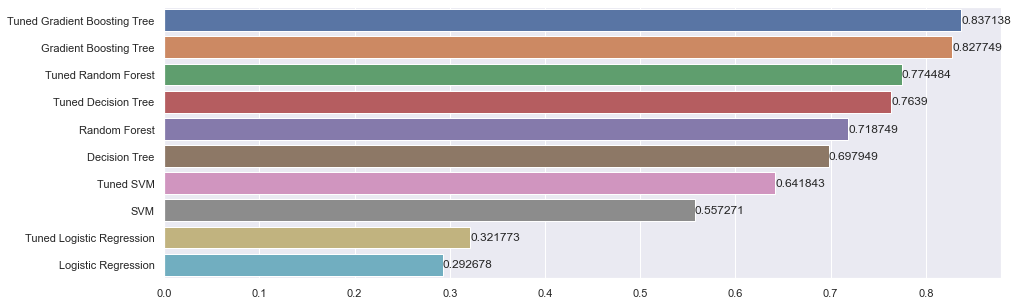

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(list(result.values()), list(result.keys()))
ax.bar_label(ax.containers[0])
plt.show()

**Dari lima algoritma supervised machine learning yang digunakan, dapat dilihat bahwa algoritma gradient boosting tree yang telah melalui proses tuning memiliki rata-rata f1-score tertinggi. Sehingga akan digunakan tuned gradient boosting tree untuk melakukan prediksi data test.csv.**

# Prediction with Tuned Gradient Boosting Tree

In [ ]:
df_test.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], inplace=True, axis=1)
df_test[df_test.corr().index] = scaler.transform(df_test[df_test.corr().index])
for column in ['international_plan', 'voice_mail_plan']:
    df_test[column] = LabelEncoder().fit_transform(df_test[column])
encoder = BinaryEncoder(df_test.state,return_df=True)
state = encoder.fit_transform(df_test.state, inplace=True)
area_code = pd.get_dummies(df_test['area_code'])
df_test.drop('area_code', axis = 1, inplace = True)
df_test = pd.concat([area_code, df_test], axis=1)
df_test.drop('state', axis=1, inplace=True)
df_test = pd.concat([state, df_test], axis=1)
df_test

,state_0,state_1,state_2,state_3,state_4,state_5,area_code_408,area_code_415,area_code_510,account_length,...,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,0,0,0,0,1,0,1,0,0.518519,...,1.5625,0.384615,1.161889,-0.037037,-0.048569,-0.333333,0.655144,-0.333333,-0.085106,0.0
1,0,0,0,0,1,0,0,0,1,0.333333,...,0.0000,-0.076923,0.589423,0.037037,0.293148,0.666667,0.052675,0.666667,-1.148936,-1.0
2,0,0,0,0,1,1,0,1,0,-0.703704,...,0.0000,-1.153846,-0.820347,-0.888889,1.569818,-0.037037,0.039506,0.666667,0.808511,3.0
3,0,0,0,1,0,0,0,0,1,-0.129630,...,0.0000,0.538462,0.140493,0.407407,0.258456,0.777778,-1.050206,-0.333333,-0.627660,2.0
4,0,0,0,1,0,1,0,1,0,1.370370,...,0.0000,-0.923077,-0.771094,0.444444,1.125759,0.555556,0.744033,0.333333,1.500000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,1,0,0,0,0,1,0,0.555556,...,0.0000,-0.038462,-0.838111,-0.111111,0.378144,0.407407,0.032922,1.000000,0.287234,-1.0
746,0,1,0,1,1,0,1,0,0,-0.500000,...,0.0000,0.692308,-0.045216,-0.592593,1.028621,0.444444,0.612346,-0.666667,0.574468,2.0
747,1,0,1,1,1,0,0,1,0,0.962963,...,0.0000,-0.384615,0.050868,-1.000000,0.827407,0.481481,0.194239,-0.666667,1.265957,2.0
748,1,0,1,1,0,0,0,1,0,-0.722222,...,0.0000,-0.423077,-0.547436,1.037037,-0.411101,-0.111111,0.177778,0.000000,0.946809,0.0


In [ ]:
y_pred = gbc2.predict(df_test)
y_pred = pd.DataFrame({'id':ID,'churn':y_pred})
y_pred

,id,churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
745,746,0
746,747,0
747,748,0
748,749,0


In [ ]:
y_pred.to_csv('pred.csv',index=False)